# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [359]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [360]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

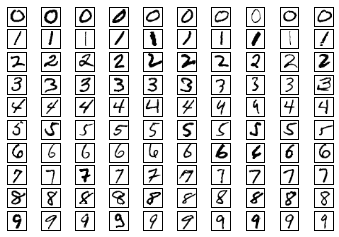

In [361]:
#def P1(num_examples=10):

### STUDENT START ###
# Carson's Notes: X is a vector with weights of 0-1 representing color from white to black
# Y is the outcome that shows which number the vector represents

# Calculate dimensions of each plot
pixel_dim = (X[1].size)**.5 

# Take 10  examples of each digit of each digit and reshape to a grid
by_number = np.concatenate([X[Y == i][0:10] for i in range(10)])
new_x = np.array([np.array(by_number[i]).reshape(pixel_dim, pixel_dim) for i in range(100)])

# Plots
for index, image in enumerate(new_x, 1):
    plt.subplot(10,10,index)
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    plt.imshow(image, cmap = 'Greys')

### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [368]:
#def P2(k_values):

### STUDENT START ###

# Function for calculating predictons for a given k
def k_predictions(neighbors):
    neighbors_model = KNeighborsClassifier(n_neighbors = neighbors)
    neighbors_model.fit(mini_train_data, mini_train_labels)
    predictions = neighbors_model.predict(dev_data) 
    return predictions

# Function that returns accuracy for a given k
def k_accuracy(neighbors):
    neighbors_model = KNeighborsClassifier(n_neighbors = neighbors)
    neighbors_model.fit(mini_train_data, mini_train_labels)
    return neighbors_model.score(dev_data, dev_labels)

# Print accuracy for all digits, and classicication report fork = 1
labels_num = range(0,10)
labels = [str(x) for x in labels_num]
k_list = [1,3,5,7,9]

for k in k_list:
    print(k_accuracy(k))

print(classification_report(dev_labels, k_predictions(1), target_names = labels))
    


### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

0.888
0.878
0.869
0.865
0.863
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER: 9 is the most diffuclt digit for the k=1 model 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [369]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

# Repeat function for clarity - calulcates accuracy for a given k
def k_accuracy(data, data_labels):
    neighbors_model = KNeighborsClassifier(n_neighbors = 1)
    neighbors_model.fit(data, data_labels)
    return neighbors_model.score(dev_data, dev_labels)

# Function to calculate accuracy and return the time taken to calculate
def timed_accuracy(sample_size):
    start = time.time()
    accuracy = k_accuracy(train_data[:sample_size], train_labels[:sample_size])
    finish = time.time()
    print("Time taken: %f" %(finish - start))
    print("Accuracy: %f" %(accuracy))
    return accuracy

sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracy = []
for size in sizes:
    accuracy.append(timed_accuracy(size))

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Time taken: 0.097927
Accuracy: 0.720000
Time taken: 0.182991
Accuracy: 0.786000
Time taken: 0.374711
Accuracy: 0.841000
Time taken: 0.801121
Accuracy: 0.884000
Time taken: 1.823182
Accuracy: 0.902000
Time taken: 3.583252
Accuracy: 0.926000
Time taken: 7.177707
Accuracy: 0.937000
Time taken: 15.277523
Accuracy: 0.959000
Time taken: 32.171671
Accuracy: 0.970000


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [424]:
#def P4():

### STUDENT START ###
size_lm = LinearRegression()
size_fit = size_lm.fit(np.array(sizes).reshape(9,1),(np.array(accuracy)))

# Show predicted accuracy for n = 6000, which returns a number > 1
dev_sizes = np.array([60000]).reshape(1,1)
print(size_fit.predict(dev_sizes))

# Fit with logs
log_size_fit = size_lm.fit(np.log(np.array(sizes)).reshape(9,1),(np.array(accuracy)))
log_dev_sizes = np.log(dev_sizes)

# Still returns a number > 1, but much closer this time
print(log_size_fit.predict(log_dev_sizes))

### STUDENT END ###

#P4()

[ 1.24307226]
[ 1.03386514]


ANSWER: Using linear regression to predict a percentage, which must fall between 0 and 1, doesn't make a whole lot of sense since the model can return numbers greater than 1. Taking a log of the X variable scales it more appropriately.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


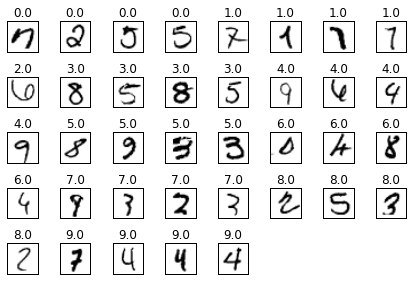

In [322]:
#def P5():

### STUDENT START ###
# Repeated for clarity - Function for calculating predictons for a given k
def k_predictions(neighbors):
    neighbors_model = KNeighborsClassifier(n_neighbors = neighbors)
    neighbors_model.fit(mini_train_data, mini_train_labels)
    predictions = neighbors_model.predict(dev_data) 
    return predictions

predictions_nn1 = k_predictions(1)

# 4's and 9's most confused with each other
print(confusion_matrix(dev_labels, predictions_nn1, labels = np.array(labels_num)))

# Find the misclassifications
mistakes = dev_data[dev_labels != predictions_nn1]
mistakes_targets = predictions_nn1[dev_labels != predictions_nn1]
pixel_dim = (X[1].size)**.5

# Take up to four of each mistake
by_number = np.concatenate([mistakes[mistakes_targets == i][0:4] for i in range(10)])
by_number_targets = np.concatenate([mistakes_targets[mistakes_targets == i][0:4] for i in range(10)])
mistakes_reshape = np.array([np.array(by_number[i]).reshape(pixel_dim, pixel_dim) for i in range(37)])

# Plot example mistakes wth correct label
for index, mistake in enumerate(mistakes_reshape, 1):
    plt.subplot(5,8,index)
    frame1 = plt.gca()
    frame1.set_title(by_number_targets[index - 1])
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.imshow(mistake, cmap = 'Greys')
    
### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

0.888
0.716
0.105
0.902


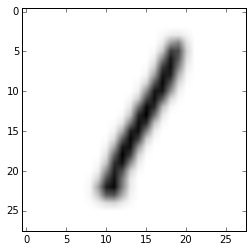

In [95]:
#def P6():
    
### STUDENT START ###

# reshape training data as grid and copy to avoid altering original data
reshaped_train = np.array([np.array(mini_train_data[i]).reshape(pixel_dim, pixel_dim) for i in range(1000)])
reshaped_train_copy = reshaped_train[:]

# same for dev data
reshaped_dev = np.array([np.array(dev_data[i]).reshape(pixel_dim, pixel_dim) for i in range(1000)])
reshaped_dev_copy = reshaped_dev[:]

# Function for returning vaalue by index. Only returns if not negative and not out of range
def get_pix(row, col, arr):
        try:
            if row >= 0 and col >= 0: # prevents negative indexing
                return(arr[row, col])
            else:
                return(-1)
        except: # prevents index out of range
            return(-1)

# Blur pixels as a weighted combination of surrounding pixels. 
# Constant values reflect Gaussian weights for a 3x3 matrix.
def blur_image(img):
    blurred_image = []  
    for row_index, row in enumerate(img):
        for col_index, pixel in enumerate(row):
            center = pixel * .147761 # values based on Gaussian weightsin a 3x3 matrix
            weights = np.array([center,
            get_pix(row_index - 1, col_index, img) * .0566406,
            get_pix(row_index + 1, col_index, img) * .0566406,
            get_pix(row_index, col_index + 1, img) * .0566406,
            get_pix(row_index, col_index - 1, img) * .0566406,
            get_pix(row_index - 1, col_index + 1, img) * .0453542,
            get_pix(row_index + 1, col_index + 1, img) * .0453542,
            get_pix(row_index - 1, col_index - 1, img) * .0453542,
            get_pix(row_index + 1, col_index - 1, img) * .0453542])

            positives = np.array([x >= 0 for x in weights]) #ignore negatives that mean get_pix failed
            size = sum(positives)
            total = sum(weights[weights > 0]) / size
            blurred_image.append(total)
            
    return(blurred_image)

# Function returns accuarcy for a k=1 nearest neighbors model and takes different data sets as input
def blur_accuracy(data, data_labels, val_data, val_labels):
    neighbors_model = KNeighborsClassifier(n_neighbors = 1)
    neighbors_model.fit(data, data_labels)
    return neighbors_model.score(val_data, val_labels)

# Blur training data - process takes a while. Could probably be for efficient
blurred_training = [blur_image(x) for x in reshaped_train_copy]

# Blur dev data 
blurred_dev = [blur_image(x) for x in reshaped_dev_copy]

# Test that it worked by plotting blurred image
test = blurred_training[0]
plt.imshow(np.array(test).reshape(28,28), cmap = 'Greys')

# Fit with regular training data regular dev
print(blur_accuracy(mini_train_data, mini_train_labels, dev_data, dev_labels))

# Fit with blurred training data regular dev
print(blur_accuracy(blurred_training, mini_train_labels, dev_data, dev_labels))

# Fit with regular training data blurred dev
print(blur_accuracy(mini_train_data, mini_train_labels, blurred_dev, dev_labels))

# Fit with blurred training data blurred dev
print(blur_accuracy(blurred_training, mini_train_labels, blurred_dev, dev_labels))
    

### STUDENT END ###

#P6()

ANSWER: using blurred data fr both training and dev produces he best accuracy.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

0.815
0.791


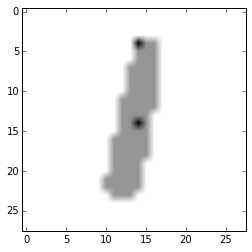

In [426]:
#def P7():

### STUDENT START ###

# Bernoulli Model
binary_nb = BernoulliNB(binarize=0.5)
binary_nb_fit = binary_nb.fit(mini_train_data, mini_train_labels)
print(binary_nb_fit.score(dev_data, dev_labels))

# Restructure train data as 3-level multinomial, white = 1, gray = 2, black = 3
multinomial_data = np.array(mini_train_data[:])
multinomial_data[multinomial_data == 1] = 2 
multinomial_data[(multinomial_data > 0) & (multinomial_data < 2)] = 1

# Restructure dev data as 3-level multinomial
multinomial_dev = np.array(dev_data[:])
multinomial_dev[multinomial_dev == 1] = 2 
multinomial_dev[(multinomial_dev > 0) & (multinomial_dev < 2)] = 1

#print(np.unique(multinomial_data))
#print(multinomial_data[0])
plt.imshow(multinomial_data[5].reshape(28,28), cmap = 'Greys')

multi_nb = MultinomialNB()
multi_nb_fit = multi_nb.fit(multinomial_data, mini_train_labels)
print(multi_nb_fit.score(multinomial_dev, dev_labels))

    
### STUDENT END ###

#P7()

ANSWER: The multilevel model does not improve accracy, probably because the 3 levels provide more information than we need, and so we're ovefitting a bit. Kind of like the opposite of the blurring from part 6 - we are getting more rdeatiled instead of less so.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [442]:
#def P8(alphas):

### STUDENT START ###

binary_nb = BernoulliNB(binarize=0.5)
alpha_values = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

alpha_grid = GridSearchCV(binary_nb, alpha_values)
alpha_grid.fit(mini_train_data, mini_train_labels)

#Best fit is with alpha = .01
print(alpha_grid.grid_scores_)

print('Best alpha: ' + str(alpha_grid.best_params_))


### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}, mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}, mean: 0.81500, std: 0.02013, params: {'alpha': 0.1}, mean: 0.80000, std: 0.01188, params: {'alpha': 0.5}, mean: 0.79500, std: 0.01145, params: {'alpha': 1.0}, mean: 0.78400, std: 0.01934, params: {'alpha': 2.0}, mean: 0.72000, std: 0.02495, params: {'alpha': 10.0}]
Best alpha: {'alpha': 0.01}


In [14]:
#print nb.best_params_

ANSWER: The best value for alpha is .01. When alpha = 0, the result is close to the binary model we fit in part 7, but a little higher since it is tested on the training data instead of the dev data. This is what I would expect.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [443]:
#def P9():

### STUDENT END ###

gnb = GaussianNB()
gnb_fit = gnb.fit(mini_train_data, mini_train_labels)
print('Accuracy: %f' %gnb.score(dev_data, dev_labels))

# Looks like mean and variance of most features for a given class = 0
# print("Theta: %s" %gnb_fit.theta_)
# print("Sigma: %s" %gnb_fit.sigma_)

# Add normal noise ranging with standard deviation ranging from .01 to .5
sd_list = np.arange(.01, .5, .01)
noise = [np.random.normal(0, x, [1000, 784]) for x in sd_list]

# Reshape noise to be 1 row for each standard deviation, 
# and each row is the size of the whole training data set
noise_reshape = np.array(noise).reshape(49, 784000)

# Add noise wih different stadard_deviations to trainng set
# Print standard deviation of noise along with accuracy
# Best results seem t be with noise that has standard deviation between .09 and .16
for index, noise_row in enumerate(noise_reshape):
    noise_matrix = noise_row.reshape(1000, 784)
    gnb_fit = gnb.fit(mini_train_data + noise_matrix, mini_train_labels)
    print(sd_list[index],gnb.score(dev_data, dev_labels))


### STUDENT END ###

#gnb = P9()

Accuracy: 0.627000
(0.01, 0.71699999999999997)
(0.02, 0.73299999999999998)
(0.029999999999999999, 0.749)
(0.040000000000000001, 0.76300000000000001)
(0.050000000000000003, 0.76900000000000002)
(0.060000000000000005, 0.77800000000000002)
(0.069999999999999993, 0.78300000000000003)
(0.080000000000000002, 0.78700000000000003)
(0.089999999999999997, 0.78700000000000003)
(0.099999999999999992, 0.79700000000000004)
(0.11, 0.78600000000000003)
(0.12, 0.79300000000000004)
(0.13, 0.79500000000000004)
(0.14000000000000001, 0.79100000000000004)
(0.15000000000000002, 0.78800000000000003)
(0.16, 0.79600000000000004)
(0.17000000000000001, 0.78700000000000003)
(0.18000000000000002, 0.78000000000000003)
(0.19, 0.77900000000000003)
(0.20000000000000001, 0.77300000000000002)
(0.21000000000000002, 0.78100000000000003)
(0.22, 0.77400000000000002)
(0.23000000000000001, 0.76900000000000002)
(0.24000000000000002, 0.77100000000000002)
(0.25, 0.77000000000000002)
(0.26000000000000001, 0.76600000000000001)
(0.2

ANSWER: Like the multinomial model, the Gaussian model is probably overfitting, since the model is using a more detailed representation of the data. Adding some noise to the training set helps prevent the overfitting and so gets beter results when the model is applied to the dev data set.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

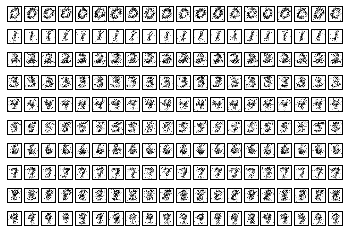

In [358]:
#def P10(num_examples):

### STUDENT START ###

# Bernoulli Model

binary_nb = BernoulliNB(binarize=0.5)
binary_nb_fit = binary_nb.fit(mini_train_data, mini_train_labels)

# Function turns a pixel on with the probability estimated by the model given a particular class
# Returns a vector of booleans indicating whether pixel is on or off
def gen_image(pix_prob):
    return(np.where(np.random.rand(1, 784) < np.exp(pix_prob),1, 0))

# Close plots
plt.close('all')

# Generate 20 vectors for each digit and plot them
for index, number in enumerate(binary_nb_fit.feature_log_prob_, 0):
    for rep in range(0, 20):
        plot_number = (rep + (index * 20)) + 1 # subplot positions start at 1 not 0
        #print(plot_number)
        plt.subplot(10,20,plot_number)
        frame1 = plt.gca()
        #frame1.set_title(index)
        #fig = plt.figure(figsize=(5, 5))
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        #plt.tight_layout()
        plt.imshow(gen_image(number).reshape(28,28), cmap = 'Greys')
        
### STUDENT END ###

#P10(20)

ANSWER: The are not continuouse lines, but rather a bunch of dots. Since all the features are independent a dot can appear off away from all the other points, whereas a real human would probably never make a mark away from the number.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [502]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
binary_nb = BernoulliNB(binarize=0.5, alpha = .01)
binary_nb_fit = binary_nb.fit(mini_train_data, mini_train_labels)

predictions = binary_nb_fit.predict(dev_data)
check = predictions == dev_labels

# Find posterior probabilties and store max for each observation
posterior = binary_nb_fit.predict_proba(dev_data)
posterior_max = np.amax(posterior, 1)


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]


counts = np.zeros(9)
correct = np.zeros(9)

# Loop through each bucket for each posterior probability
# Update count and correct
for index1, post in enumerate(posterior_max):
    for index2, bucket in enumerate(buckets):
        if post > bucket:
            pass
        else:
            counts[index2] += 1
            if check[index1] == True:
                correct[index2] += 1
            break
            
print(counts)     
print(correct)
correct / counts


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

[   0.   30.   86.   85.   58.   61.   73.   75.  532.]
[   0.    6.   40.   52.   40.   46.   64.   63.  507.]


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: invalid value encountered in divide


array([        nan,  0.2       ,  0.46511628,  0.61176471,  0.68965517,
        0.75409836,  0.87671233,  0.84      ,  0.95300752])

ANSWER: The Naive Bayes model appears to be callibrated though not particularly strongly. The accuracy increases with the posterior probability, but even at a posterior of 0.9999999999999, the accuracy is still only 84%.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()